# Data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('medical_cost_data.csv')

In [3]:
data.head()

,Unnamed: 0,age,sex,height,weight,bmi,caloric_intake,mean_heart_rate,glucose_levels,children,work_hours,income,region,charges
0,0,19,female,189,99.661590,27.900,2788,89.185611,4.508627,0,9.472349,1006.255278,southwest,16884.92400
1,1,18,male,197,131.057993,33.770,2893,62.081449,4.490951,1,7.933420,1000.063069,southeast,1725.55230
2,2,28,male,184,111.724800,33.000,2008,85.128197,4.124635,3,8.327503,1002.599742,southeast,4449.46200
3,3,33,male,194,85.452538,22.705,2708,50.142537,5.241815,0,16.514809,1001.152425,northwest,21984.47061
4,4,32,male,173,86.434952,28.880,2092,88.009636,5.018429,0,7.642277,1000.432587,northwest,3866.85520


In [4]:
data.columns

Index(['Unnamed: 0', 'age', 'sex', 'height', 'weight', 'bmi', 'caloric_intake',
       'mean_heart_rate', 'glucose_levels', 'children', 'work_hours', 'income',
       'region', 'charges'],
      dtype='object')

In [5]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='age', ylabel='Count'>

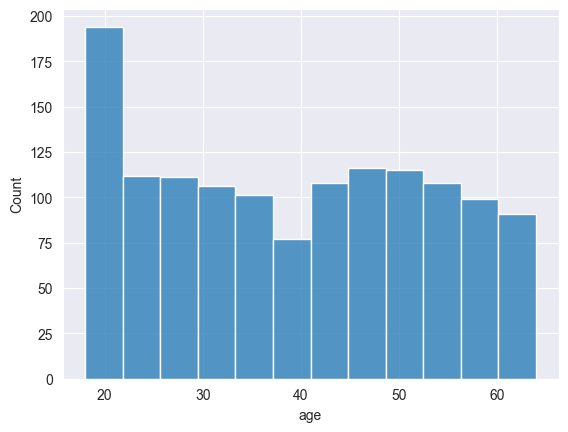

In [7]:
sns.histplot(data['age'])

<Axes: xlabel='bmi', ylabel='Count'>

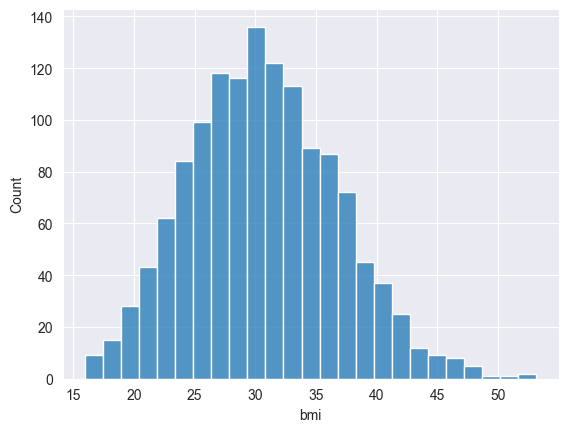

In [8]:
sns.histplot(data['bmi'])

<Axes: xlabel='charges', ylabel='Count'>

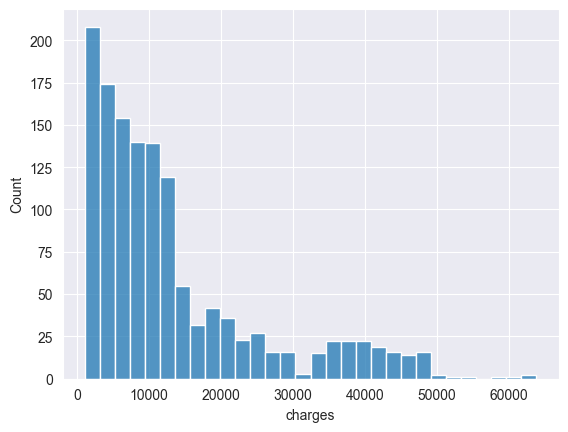

In [9]:
sns.histplot(data['charges'])

In [10]:
# See more EDA here: https://www.kaggle.com/code/hely333/eda-regression

# Enter *scikit-learn*

In [11]:
y_colname = 'charges'
y = data[y_colname]
X = data.drop([y_colname], axis=1)

In [12]:
# TRAIN-EVAL-TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cols_to_transform = ['sex', 'region']
# FIT-TRANSFORM-PREDICT LOGIC
ohe.fit(X_train[cols_to_transform])

OneHotEncoder()

In [14]:
# Use the OneHotEncoder to create a new matrix
X_gen_trans = ohe.transform(X_train[cols_to_transform]).toarray()
X_gen_trans = X_gen_trans.T

# Add the matrix rows as columns to the X_train DataFrame
new_col_names = ohe.get_feature_names_out()
for i, col in enumerate(new_col_names):
  X_train[col] = X_gen_trans[i]

# Remove the unnecessary column and adjust the data types
# It is important to keep your dataset lean (computational cost can explode quickly when scaling)
X_train = X_train.drop(cols_to_transform, axis=1)
X_train.loc[:, new_col_names] = X_train.loc[:, new_col_names].astype('int')
X_train

,Unnamed: 0,age,height,weight,bmi,caloric_intake,mean_heart_rate,glucose_levels,children,work_hours,income,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
1046,1046,43,165,68.280300,25.080,2202,88.753284,4.966763,0,8.597041,1000.079253,1.0,0.0,1.0,0.0,0.0,0.0
682,682,39,155,84.808250,35.300,2751,88.511847,4.096989,2,11.812970,1000.011242,0.0,1.0,0.0,0.0,0.0,1.0
1037,1037,45,157,75.167125,30.495,2785,78.293301,4.048956,1,21.431029,1000.002613,1.0,0.0,0.0,1.0,0.0,0.0
490,490,19,154,78.025640,32.900,2575,77.928825,4.119456,0,7.427535,1003.511992,1.0,0.0,0.0,0.0,0.0,1.0
39,39,60,198,156.423960,39.900,1869,97.720361,4.751828,0,13.272866,1000.965729,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,18,172,92.745840,31.350,2934,77.875550,4.814286,4,8.488266,1004.077365,1.0,0.0,1.0,0.0,0.0,0.0
1130,1130,39,168,67.370688,23.870,2904,50.318838,4.571170,5,9.055854,1022.956869,1.0,0.0,0.0,0.0,1.0,0.0
1294,1294,58,164,67.710680,25.175,2479,77.575043,5.213987,0,10.578797,1000.063430,0.0,1.0,1.0,0.0,0.0,0.0
860,860,37,184,161.154560,47.600,1656,63.846810,4.504620,2,16.567698,1000.812762,1.0,0.0,0.0,0.0,0.0,1.0


In [15]:
# Put it into a function -> DRY (don't repeat yourself)
def ohe_transform_cat_feats(ohe, X):
  cols_to_transform = ['sex', 'region']
  # Use the OneHotEncoder to create a new matrix
  X_gen_trans = ohe.transform(X[cols_to_transform]).toarray()
  X_gen_trans = X_gen_trans.T

  # Add the matrix rows as columns to the X DataFrame
  new_col_names = ohe.get_feature_names_out()
  for i, col in enumerate(new_col_names):
    X[col] = X_gen_trans[i]

  # Remove the unnecessary column and adjust the data types
  # It is important to keep your dataset lean (computational cost can explode quickly when scaling)
  X = X.drop(cols_to_transform, axis=1)
  X.loc[:, new_col_names] = X.loc[:, new_col_names].astype('int')
  return X

In [16]:
# Now do the same for the X_test
# Why is it important to do them separately?
X_test = ohe_transform_cat_feats(ohe, X_test)
X_test

,Unnamed: 0,age,height,weight,bmi,caloric_intake,mean_heart_rate,glucose_levels,children,work_hours,income,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
764,764,45,181,82.475818,25.175,2814,83.612513,4.373338,2,8.473943,1000.509934,1.0,0.0,1.0,0.0,0.0,0.0
887,887,36,194,112.983272,30.020,2833,66.371988,4.652292,0,8.642828,1162.168417,1.0,0.0,0.0,1.0,0.0,0.0
890,890,64,170,77.697650,26.885,2933,92.959231,4.117142,0,10.276023,1014.796519,1.0,0.0,0.0,1.0,0.0,0.0
1293,1293,46,188,90.993128,25.745,1763,59.467169,4.609396,3,8.742813,1001.131353,0.0,1.0,0.0,1.0,0.0,0.0
259,259,19,162,83.770848,31.920,1940,83.358230,5.063206,0,9.766670,1001.728314,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,644,43,179,113.136771,35.310,2995,96.382310,4.285086,2,6.660268,1004.907353,0.0,1.0,0.0,0.0,1.0,0.0
602,602,56,173,75.720370,25.300,2277,52.323727,5.252695,0,8.462220,1003.221429,1.0,0.0,0.0,0.0,0.0,1.0
731,731,53,165,58.261500,21.400,1821,59.682528,5.076635,1,9.615741,1220.491675,0.0,1.0,0.0,0.0,0.0,1.0
321,321,26,177,92.859156,29.640,2473,85.658888,4.583662,4,8.954053,1000.017595,1.0,0.0,1.0,0.0,0.0,0.0


# Train the ML model

In [17]:
from sklearn.linear_model import Ridge

In [18]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [20]:
y_pred = ridge.predict(X_test)

# Score the model

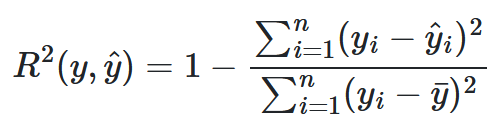

In [21]:
from IPython.display import Image
Image('R2_score_sklearn.png') # Reference: https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score (retrieved 2023-05-21)

In [22]:
from sklearn.metrics import r2_score, mean_squared_error # https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
# User guide: https://scikit-learn.org/stable/modules/model_evaluation.html
score = r2_score(y_test, y_pred)
score

0.6181561839006313

In [23]:
# Not as easy to interpret as the r2_score
mean_squared_error(y_test, y_pred)

55957170.642301254

# Assignment: What if we train it without train-test-split?

In [ ]:
# First, fit the OneHotEncoder on the full dataset
ohe_full = OneHotEncoder()
cols_to_transform = ['sex', 'region']
ohe_full.fit(X[cols_to_transform])
# X_temp = ... # Assignment: one-hot-encode categorical features
X_temp = ohe_transform_cat_feats(ohe_full, X)

# Now, train Ridge on the full dataset
ridge_full = Ridge(alpha=1.0)

# Fit the model on X_temp and y


# Predict the values
y_pred = ridge_full.predict(???)

# Calculate the R2 score
score_full = r2_score(???)
score_full

# Assignment: Use the GradientBoostingRegressor instead of Ridge

This time (and from now on always), use the train-test-split again, it is the best practice!

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

# Instantiate a GradientBoostingRegressor with default parameter values

# Fit on X_train, y_train

# Predict on X_test
y_pred = ...

# Get the R2 score for y_test and y_pred
score = ...
score

In [ ]:
# GradientBoostingRegressor also uses the r2_score under the hood
gbr.score(X_test, y_test)

In [ ]:
mean_squared_error(y_test, y_pred)

# Hyperparameter tuning

In [ ]:
Image(DRIVE_PATH+'grid_search.png') # Reference: https://en.wikipedia.org/wiki/Hyperparameter_optimization (retrieved 2023-05-21)

In [ ]:
Image(DRIVE_PATH+'complicated_function.png') # Source: https://en.wikipedia.org/wiki/Test_functions_for_optimization (retrieved 2021-05-03)

In [ ]:
from sklearn.model_selection import GridSearchCV # Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV (retrieved 2023-05-21)

In [ ]:
gbr = GradientBoostingRegressor()

# Define the parameters to try out = 'the search space'
parameters = {'learning_rate': [0.01, 0.1], 'criterion': ('friedman_mse','squared_error')}

# Use the GridSearch algorithm almost in the same way as an ML model
gscv = GridSearchCV(gbr, parameters, verbose=1)
gscv.fit(X_train, y_train)

y_pred = gscv.predict(X_test)

score = r2_score(y_test, y_pred)
score

In [ ]:
gscv.cv_results_

In [ ]:
gs_res = gscv.best_params_
gs_res

In [ ]:
# Cross-validation intuition
Image(DRIVE_PATH+'grid_search_cross_validation.png') # Reference: https://scikit-learn.org/stable/modules/cross_validation.html (retrieved 2023-05-21)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV # Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV (retrieved 2023-05-21)

In [ ]:
Image(DRIVE_PATH+'randomized_search.png') # Reference: https://en.wikipedia.org/wiki/Hyperparameter_optimization (retrieved 2023-05-21)

In [ ]:
Image(DRIVE_PATH+'optimized_search.png') # Reference: https://en.wikipedia.org/wiki/Hyperparameter_optimization (retrieved 2023-05-21)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Use previous best results as a starting point
mu = gs_res['learning_rate']
sigma = gs_res['learning_rate']

# Set array size and bounds for the clipping (remember: learning rate must be strictly positive!)
size = 100  # Number of samples
lower_bound = mu/1000  # Lower bound for clipping
upper_bound = np.inf  # No upper bound

# Generate random numbers from the clipped normal distribution
random_numbers = np.random.normal(loc=mu, scale=sigma, size=size)
random_numbers = np.clip(random_numbers, lower_bound, upper_bound)
plt.hist(random_numbers, bins='auto')

In [ ]:
# Parameters can now include a lot of values but not all of them will be used!
parameters = {'learning_rate': random_numbers,
              'n_estimators': [5, 10, 50, 100],
              'criterion': ('friedman_mse','squared_error'),
              'loss': ('squared_error', 'absolute_error', 'huber', 'quantile')}

gbr = GradientBoostingRegressor()

# Define n_iter, too!
rscv = RandomizedSearchCV(gbr, parameters, verbose=2, random_state=42, n_iter=50,
                          refit=True)
rscv.fit(X_train, y_train)

y_pred = rscv.predict(X_test)

score = r2_score(y_test, y_pred)
score

In [ ]:
rscv_best_params = rscv.best_params_
rscv_best_params

# Assignment

Now, to compare several models and make an honest estimate of the models' behavior, you need another holdout set!

You could retrain on train+test sets and test on the holdout=validation set

In [ ]:
# Run train_test_split once to create train and test sets
# Run train_test_split again on X_test and y_test to create eval and test sets

# One-hot-encode categorical features for all sets
# Remember to fit only on the train set

# Run a RandomizedSearchCV (same as above) on X_train, y_train
    # Run one for the GradientBoostingRegressor
    # Run another on a Regressor of your preference (see https://scikit-learn.org/stable/modules/classes.html for a list of Regressors)

# Test both models on your X_eval, y_eval and pick the model with the highest score

# Finally, get the final score of your chosen model using X_test and y_test

# Learning curve

In [ ]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5), scoring=make_scorer(r2_score)):
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

        axes[0].set_title(title)
        axes[0].set_xlabel("Training examples")
        axes[0].set_ylabel("Score")

        train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                                                                              train_sizes=train_sizes, return_times=True, scoring=scoring)
        if np.any(np.isnan(train_scores)) or np.any(np.isnan(test_scores)):
            raise AssertionError("Are you trying to use a classification scoring for a regression model or vice versa?"
                                 " Please verify that the estimator and the scoring method are consistent.")

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)

        # Plot learning curve
        axes[0].grid()
        axes[0].fill_between(
            train_sizes,
            train_scores_mean - train_scores_std,
            train_scores_mean + train_scores_std,
            alpha=0.1,
            color="r",
        )
        axes[0].fill_between(
            train_sizes,
            test_scores_mean - test_scores_std,
            test_scores_mean + test_scores_std,
            alpha=0.1,
            color="g",
        )
        axes[0].plot(
            train_sizes, train_scores_mean, "o-", color="r", label="Training score"
        )
        axes[0].plot(
            train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
        )
        axes[0].legend(loc="best")

        # Plot n_samples vs fit_times
        axes[1].grid()
        axes[1].plot(train_sizes, fit_times_mean, "o-")
        axes[1].fill_between(
            train_sizes,
            fit_times_mean - fit_times_std,
            fit_times_mean + fit_times_std,
            alpha=0.1,
        )
        axes[1].set_xlabel("Training examples")
        axes[1].set_ylabel("fit_times")
        axes[1].set_title("Scalability of the model")

        # Plot fit_time vs score
        axes[2].grid()
        axes[2].plot(fit_times_mean, test_scores_mean, "o-")
        axes[2].fill_between(
            fit_times_mean,
            test_scores_mean - test_scores_std,
            test_scores_mean + test_scores_std,
            alpha=0.1,
        )
        axes[2].set_xlabel("fit_times")
        axes[2].set_ylabel("Score")
        axes[2].set_title("Performance of the model")

        plt.show()

In [ ]:
plot_learning_curve(gbr, "Learning curve for RandomizedSearchCV", X_train, y_train)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=10, test_size=0.3, random_state=45),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between"
}

for ax_idx, estimator in enumerate([gbr, rscv]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")